In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [30]:
!conda install -c anaconda xlrd --yes

The process cannot access the file because it is being used by another process.


In [31]:
pip install xlrd


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
df_c = pd.read_csv(r'C:\\Users\PRIMA\Downloads\bank\bank.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [34]:
# df_c = pd.read_csv(r'C:\\Users\PRIMA\Downloads\bank\bank-full.csv')

                  
# print ('Data read into a pandas dataframe!')

In [35]:
df_c

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [36]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [37]:
df_c.shape

(4521, 17)

In [38]:
df_c.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [39]:
df_c.value_counts()

age  job          marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  y  
19   student      single   primary    no        103     no       no    cellular  10   jul    104       2         -1     0         unknown   yes    1
45   services     single   secondary  no        1757    yes      no    cellular  20   apr    1010      3          326   1         other     no     1
     technician   married  secondary  no        88      no       no    cellular  29   aug    150       2         -1     0         unknown   no     1
                                                49      no       no    cellular  29   jul    65        2         -1     0         unknown   no     1
                                               -149     yes      no    cellular  14   jul    287       2         -1     0         unknown   no     1
                                                                                                               

In [40]:
df_c.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
df_c.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


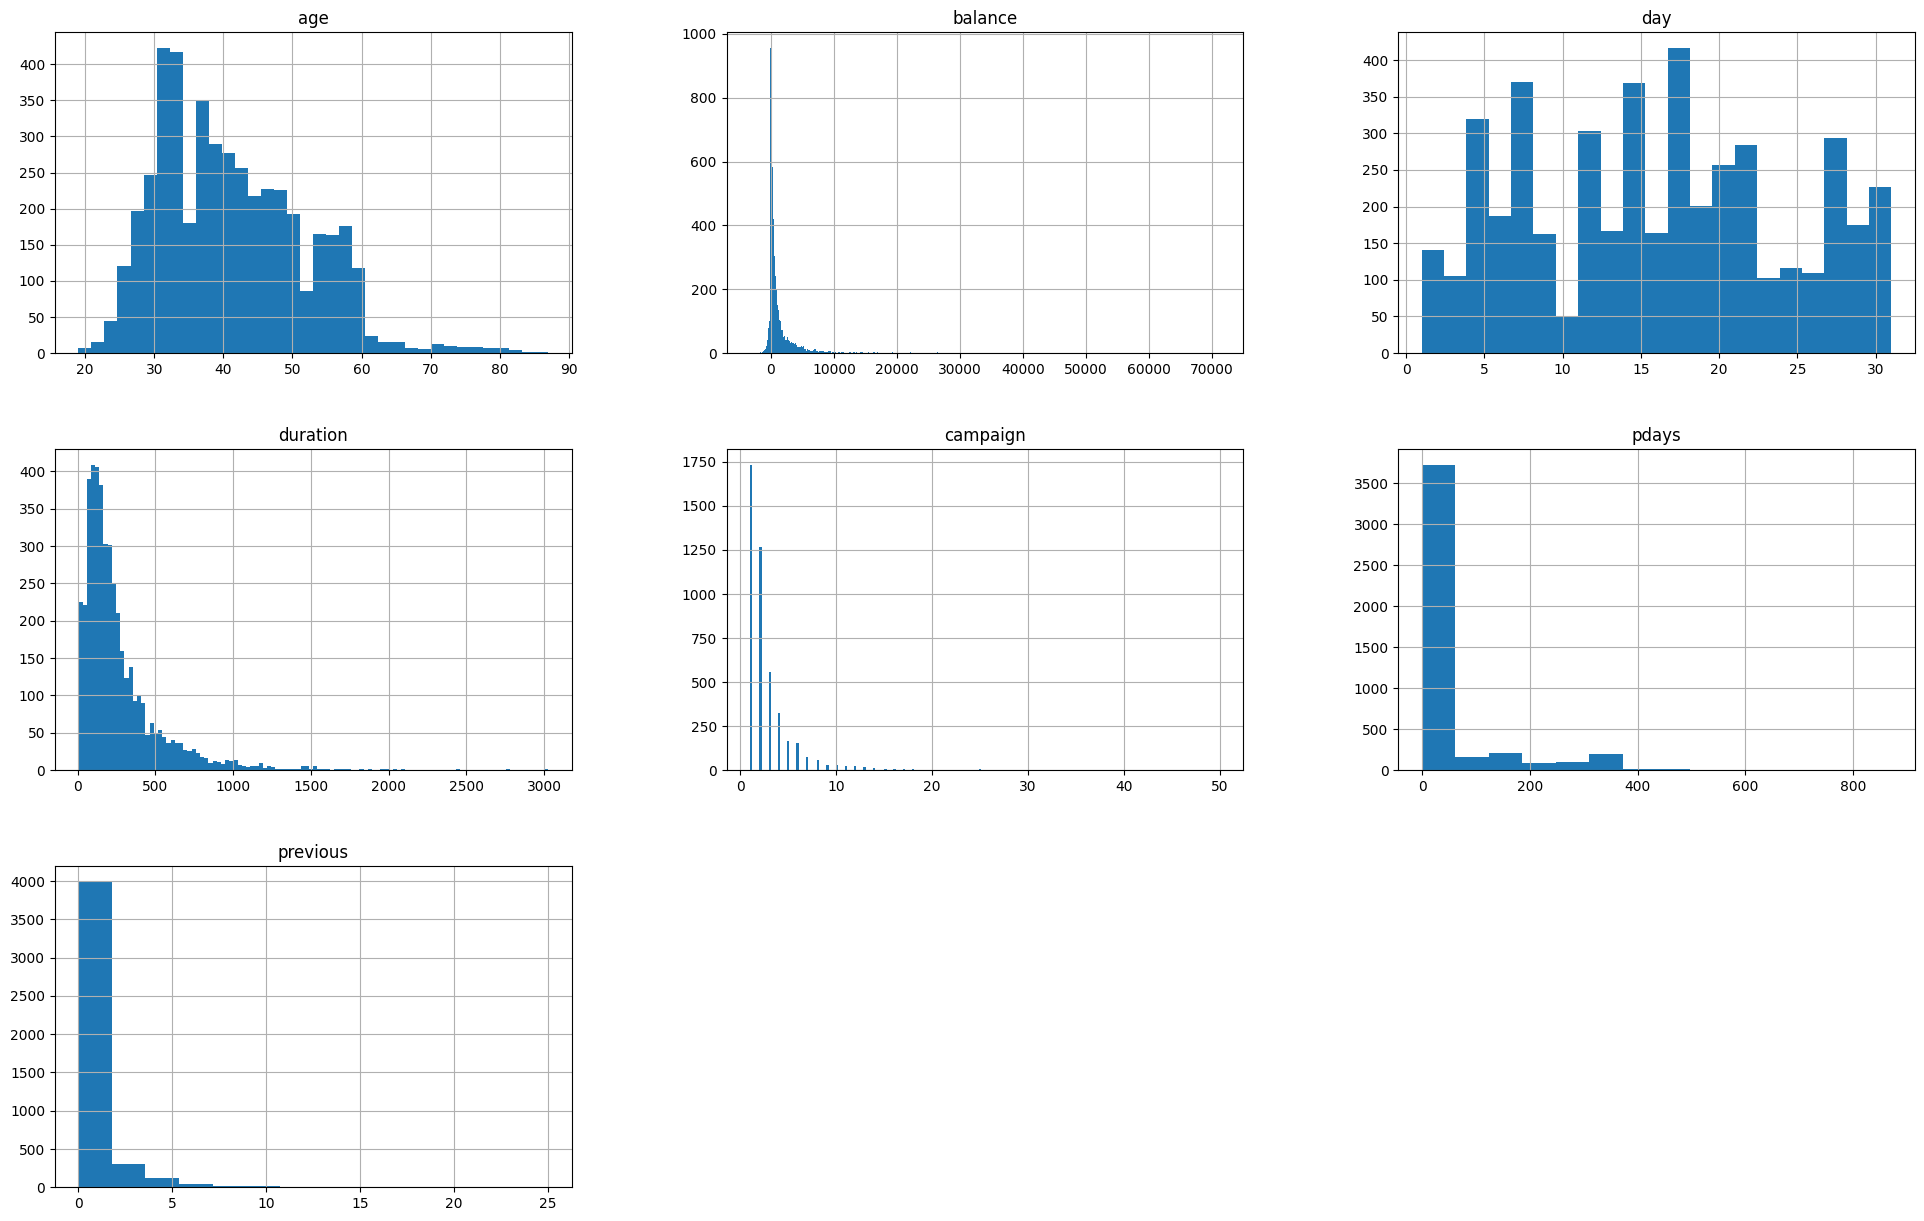

In [42]:
# Melihat distribusi frekuensi
df_c.hist(bins='auto',layout=(15,3), figsize=(24,80));

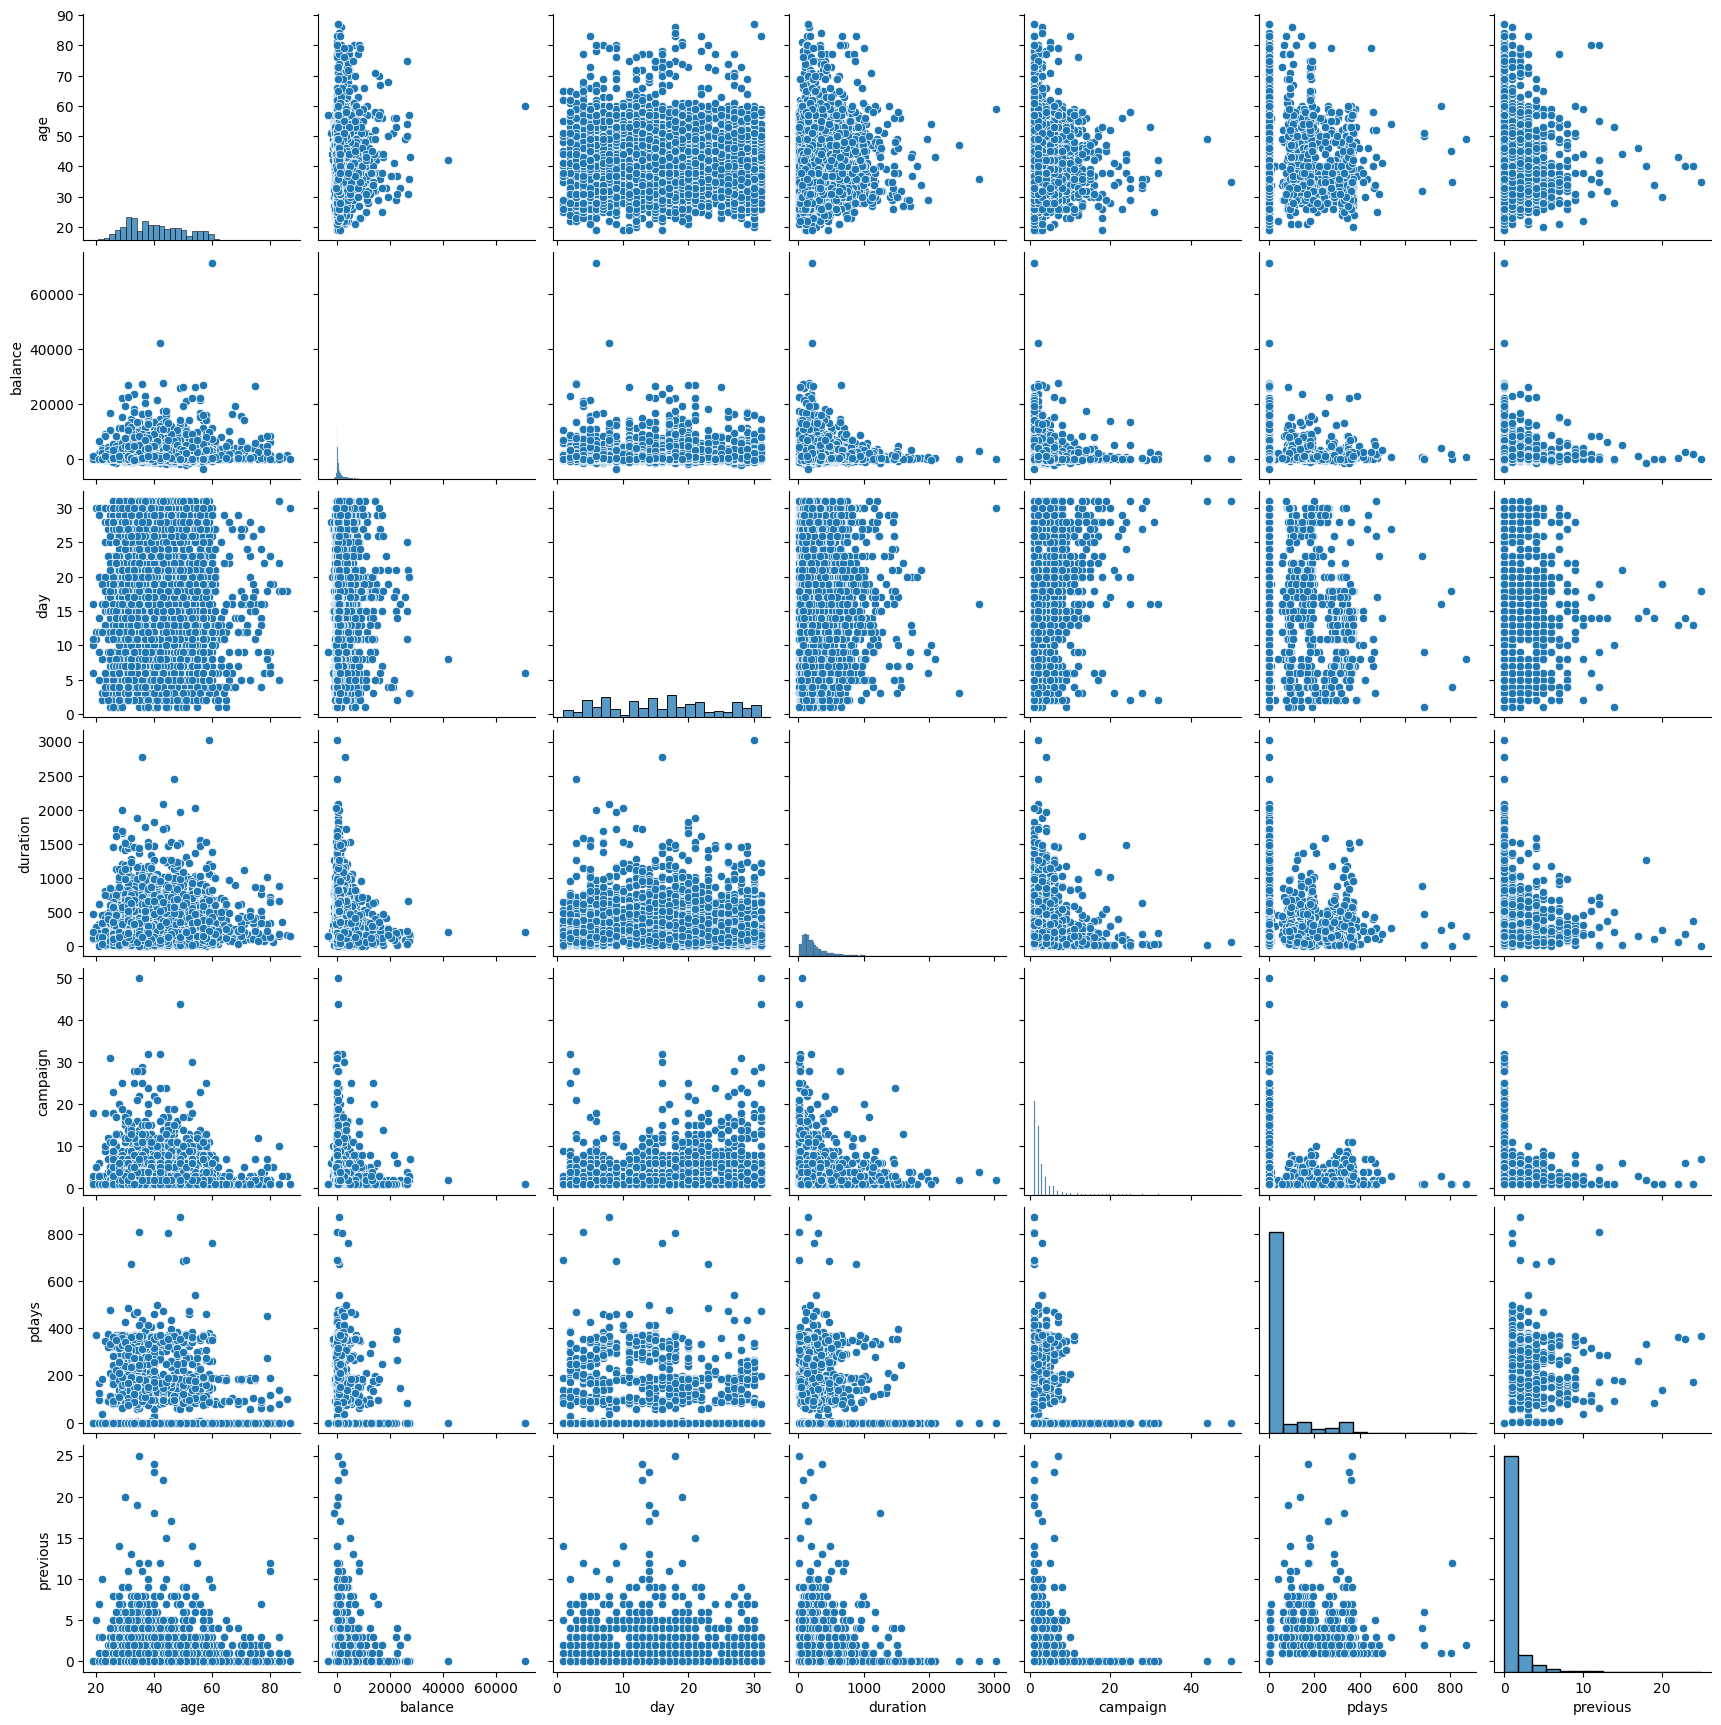

In [43]:
sns.pairplot(df_c)

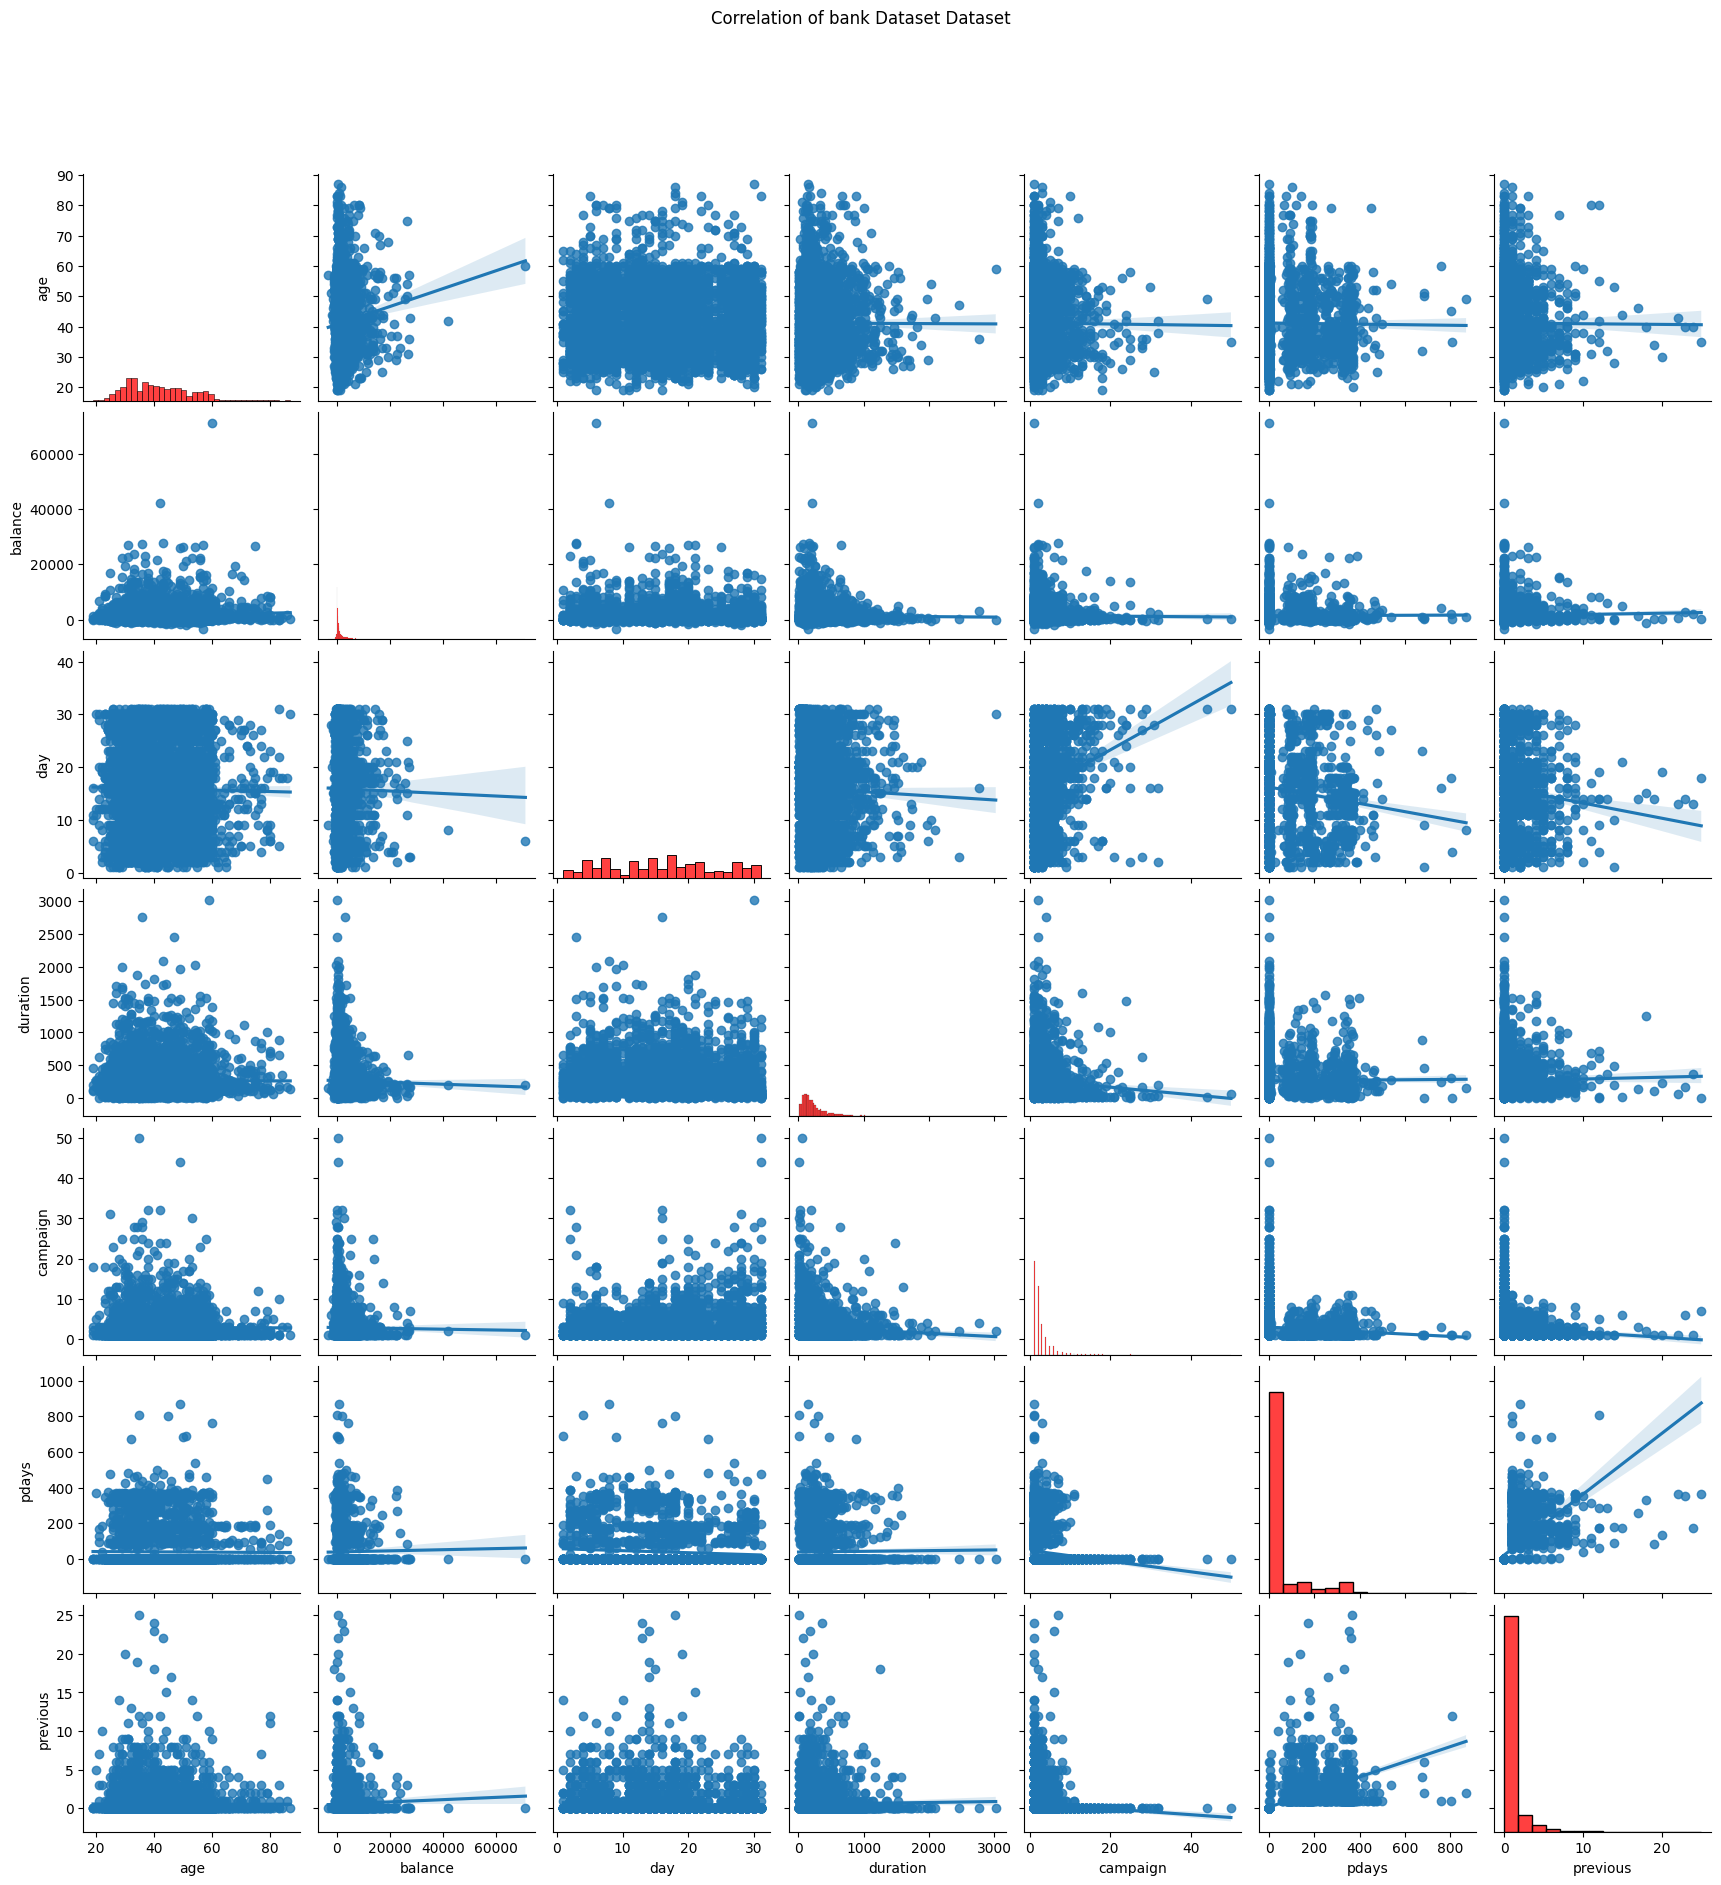

In [44]:
g= sns.pairplot(df_c,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of bank Dataset Dataset", y=1.08)

plt.show()

In [45]:
fig = px.pie(df_c, names='y', title='Distribution of Clients Subscribed to The Term Deposit',width=600, height=400)
fig.show()

C:\Users\PRIMA\AppData\Local\Temp\ipykernel_16240\553424271.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



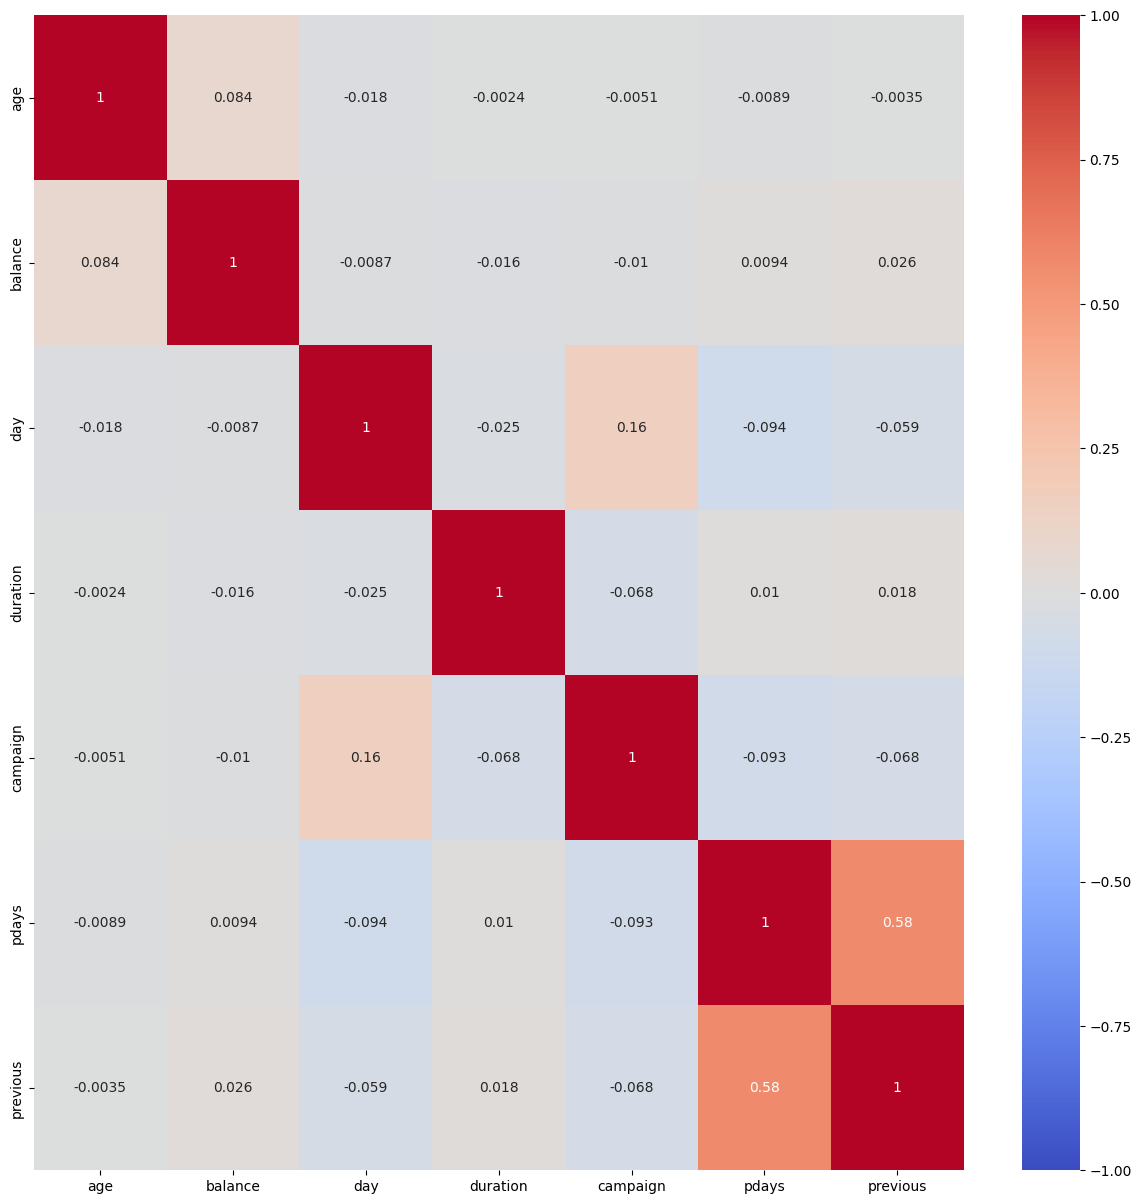

In [46]:
corr = df_c.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [47]:
corr[abs(corr['pdays']) > 0.1]['pdays']

pdays       1.000000
previous    0.577562
Name: pdays, dtype: float64

In [48]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df_c[['pdays', 'balance', 'duration', 'previous']]
x = (x-x.mean())/x.std()
y = df_c['y']

#Spliting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [49]:
print(x_train.shape, y_train.shape)

(3616, 4) (3616,)


In [50]:
print(x_train.value_counts(), y_train.value_counts())

pdays      balance    duration   previous 
-0.407173  -0.472701  -0.742568  -0.320377    5
                      -0.600182  -0.320377    4
                      -0.461644  -0.320377    3
                      -0.561699  -0.320377    3
                      -0.846472  -0.320377    3
                                             ..
           -0.371360   2.193666  -0.320377    1
           -0.371027  -0.199961  -0.320377    1
           -0.370695  -0.765658  -0.320377    1
           -0.370363  -0.727175  -0.320377    1
 8.302277  -0.213533  -0.446251   0.860565    1
Length: 3550, dtype: int64 no     3210
yes     406
Name: y, dtype: int64


Support Vector Machine Classifier Success Rate : 87.29%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



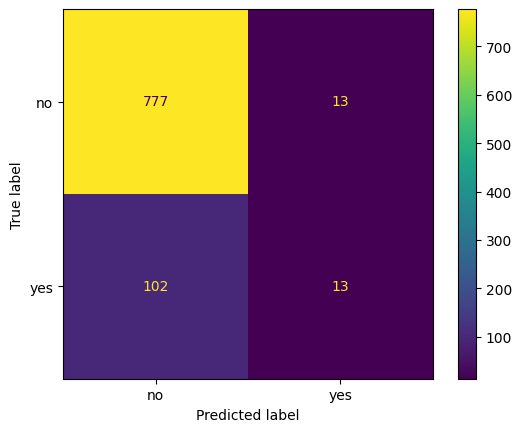

In [51]:
from sklearn import svm

svm = svm.SVC()
svm.fit(x_train,y_train)
p3=svm.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Support Vector Machine Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

Logistic Regression Classifier Success Rate : 87.07%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



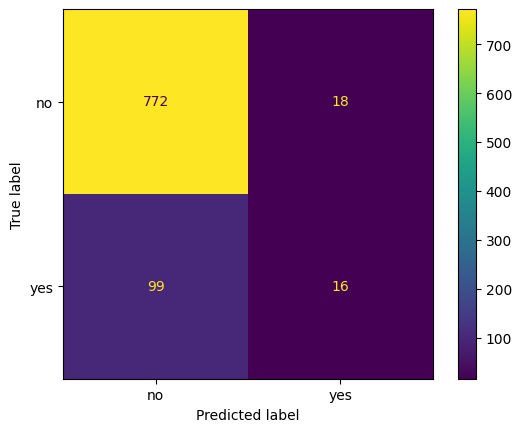

In [52]:
from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train,y_train)
p3=Logistic_Regression.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Logistic Regression Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(Logistic_Regression, x_test, y_test)
plt.show()

K-Nearest Neighbors (KNN) Classifier Success Rate : 85.86%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



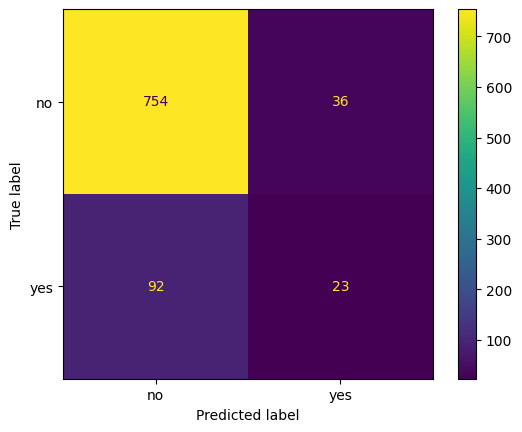

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
p3=knn.predict(x_test)
s3=accuracy_score(y_test,p3)
print("K-Nearest Neighbors (KNN) Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

Decision Tree Classifier Success Rate : 84.42%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



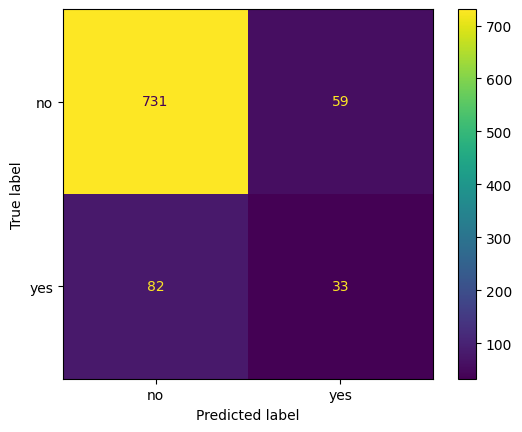

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
p3=dtc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Decision Tree Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(dtc, x_test, y_test)
plt.show()

Random Forest Classifier Success Rate : 87.07%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



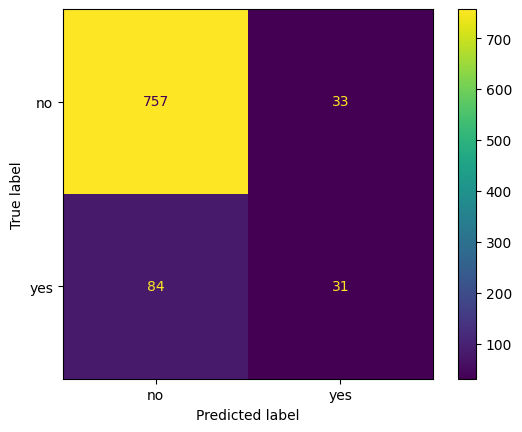

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

Naive Bayes Classifier Success Rate : 85.30%


c:\Users\PRIMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



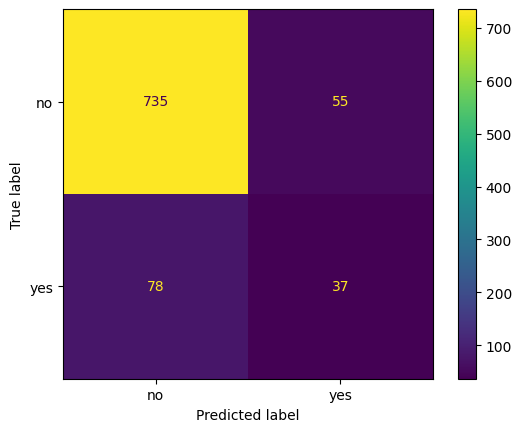

In [56]:
from sklearn.naive_bayes import GaussianNB

nvb = GaussianNB()
nvb.fit(x_train,y_train)
p3=nvb.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Naive Bayes Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(nvb, x_test, y_test)
plt.show()

## Kesimpulan :
## Menurut saya algoritma yang cocok untuk digunakan pada dataset bank merupakan algoritma Support Vector Machine karena nilai akurasi yang di hasilkan sebesar 87.29%
